# Spectral analysis assignment

In this assignment you will perform a set of operations involving spectra.  

**This assignment is due at noon on September 13.**  Your final version needs to be uploaded to your github repository by this time.

By the end of this activity you will have learned how to do the following things:
* Read in spectral files for stars
* determine the dispersion of the spectrograph in Angstrom/pixel
* plot the spectra of three stars
* measure $f_\lambda$ of each star at a specific wavelength.
* Given a frequency, derive $f_\nu$ at that frequency
* plot the filter curve of the B and V filters on top of the stellar spectra
* Calculate the B-V color of each star by convolving the spectrum with the appropriate filter curves.  compare to the published values.  During this step you will do the following calculations:
  * measure the magnitude using the central flux in each filter
  * Figure out your own way to estimate the color more accurately using the filter curve
  * repeat the same procedure using the speclite library to get the "correct" answer.
  * comment on the differences
  
Places where you need to fill in code will be indicated with a `#### Write code here`.  If the part you have to enter is in the middle of a block of code the area that ends where you have to enter code will end with `#----` Some of these will not be directly linked to points because they are simply bookkeeping things that depend on your own computer.  Other sections that specify specific problems will be indicated with a 
### Problem
statement.  Please read everything carefully to find all the places you will need to enter code


## The spectral library

We will be using the <a href=https://www.noao.edu/cflib/>"Indo-US Spectral Atlas" </a> of bright stars.  I have downloaded three stellar spectra and they are included in my github repository.

In some of the code below, the explanation will be in the commented text within the code block, so make sure to read all of it.

## Importing modules, packages, and libraries

The first step will be to import the necessary components.

In [1]:
#This library stores filter response curves and contains functions to convolve them with spectra
import speclite.filters                         

#the library that allows you to read, store, and manipulate tables
from astropy.table import Table

#Pyplot is what we will use to make many of our plots.
from matplotlib import pyplot as plt

#allows you to execute commands directly to the operating system
import os           

#this is a useful python module that allows you to assign explicit units to numbers that 
#python uses to handle unit conversions and to perform calculations.  It can be a little
#hard to get used to but is very useful once you learn how to use it.
from astropy import units as u

#built-in physical constants
from astropy import constants as c

import numpy as np

## Reading in the Files 

The next step will be to read in the files.  I encourage you to open each of the \*.txt files that contain the stellar spectra.  We will read each text file into an "astropy Table".  These are described at https://docs.astropy.org/en/stable/table/index.html and are a useful way to read in and store text data.

### Problem
Complete the missing sections of the code.

In [2]:
#Use an OS command to get the path to your home directory
homedir = os.getenv("HOME")

#here you will need to specify the directory tree that points to your spectrum files.  
#This directory starts in your home directory so you don't need to type, e.g.  /home/<username>/
#### Write code here
specdir = homedir+'/Work/Teaching/Classes/Astro_596/Fall_2021/Computer_projects/ASTR596_F21_project_workspace/Stellar-spectral-analysis/'

#this moves you to specdir so that you don't need to specify the path every time you read in a file.
os.chdir(specdir)

#this command reads the wavelength and flux of 95418.txt into a variable called star1.  
#The 'names' kwarg specifies the names of the columns
star1 = Table.read('95418.txt',format='ascii', names=('lambda','flux'))
display(star1)               #display the value of the table

#Now I would like you to read 58946.txt into a variable 'star2' and 165341.txt into a variable called star3.  
#Display the values for each table
#### Write code here
star2 = Table.read('58946.txt',format='ascii', names=('lambda','flux'))
star3 = Table.read('165341.txt',format='ascii', names=('lambda','flux'))
display(star2)               #display the value of the table
display(star3)               #display the value of the table


lambda,flux
float64,float64
3465.0,0.9348064
3465.4,0.9298626
3465.8,0.9295582
3466.2,0.9163543
3466.6,0.9428962
3467.0,0.9729065
3467.4,0.9731162
3467.8,0.965655
3468.2,0.9507776


lambda,flux
float64,float64
3465.0,0.7409257
3465.4,0.7233897
3465.8,0.7123032
3466.2,0.7190819
3466.6,0.7366779
3467.0,0.7559793
3467.4,0.7700326
3467.8,0.7757329
3468.2,0.7665706


lambda,flux
float64,float64
3465.0,0.3538652
3465.4,0.2905372
3465.8,0.2453179
3466.2,0.2475912
3466.6,0.2801426
3467.0,0.3293486
3467.4,0.373181
3467.8,0.3981356
3468.2,0.4190642


## Compute the dispersion of the spectra

### Problem

Using the print outs of the spectra above, enter the dispersion of each spectrum.  That is, what is the spacing in Angstroms between each adjacent flux point?

**Enter your answers here**
* star 1: 
* star 2: 
* star 3:


## Plot the spectra 

### Problem
Here you will plot the spectrum of the stars.  I will plot the first one and you will plot the others.  Note that the stars all have flux=1 at 5500 Angstroms.  This is because the authors of the spectral atlas normalized the spectra this way.  Therefore the absolute values of the flux aren't in physical units but arbitrary ones. However, the relative fluxes are fine.  In the first part of the code I will scale all of the spectra to have the same flux as Vega at 5500 Ang.

See https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a tutorial on using pyplot in matplotlib to make nice plots.

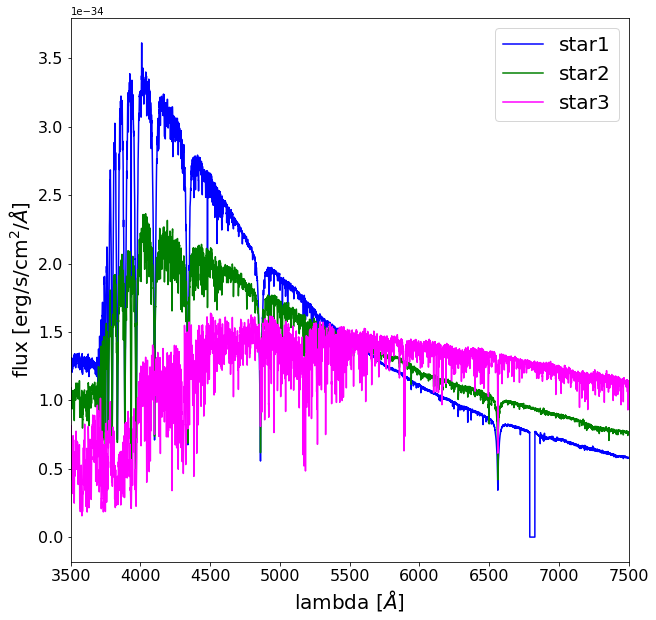

In [6]:
#scale the flux of each star to have the same flux as Vega at 5500 Ang.
#At 5500 Ang, Vega has a flux of 3.44x10^(-9) erg/s/cm^2/Ang
fvega5500 = 3.44e-9
star1['flux'] *= fvega5500
star2['flux'] *= fvega5500
star3['flux'] *= fvega5500

# use pyplot to plot each star
#this initializes a figure with a given size
plt.figure(figsize=(10,10))
#this plots the wavelength and flux of the star, makes the color of the line blue, 
#and sets the label in the legend to say "star1"
plt.plot(star1['lambda'],star1['flux'], color='blue', label='star1')

#this sets the x-range of the plot.  The y-range is scaled automatically
plt.xlim([3500,7500])

#Now I want you to plot the other two stars in the same way, 
#with star 2 plotted in green and star 3 in magenta.  Make sure to include the name of the 
#star in the legend label
#### Write code here
plt.plot(star2['lambda'],star2['flux'], color='green', label='star2')
plt.plot(star3['lambda'],star3['flux'], color='magenta', label='star3')

#----

#this provides x and y-axis labels.  The "size" command gives the size of the font
plt.xlabel('lambda [$\AA$]',size=20)
plt.ylabel('flux [erg/s/cm$^2/\AA$]', size=20)

#this sets the tick size to be easily readable
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#this plots the legend and sets the size of the text in the legend
plt.legend(fontsize=20)

#this causes the plot to display
plt.show()

### Problem
Comment on the differences and similarities between the three spectra.  

## Measure the monochromatic flux density of each star at 4500 Angstroms

You will now need to find the closest flux point to the one at 4500 angstroms and print it out.  This will be the monochromatic flux density 